# Ninth Practice ML
In this practice, we will learn how to use **Decision Tree** and **Random Forest**.  
We will also use **SVM**.  
We will learn how to classify text and use **Text Feature Extraction** methods like **N-gram** and **TF-IDF**.  

## Downloads, Imports, and Definitions

We update packages that their Colab version is too old.  

In [ ]:
# upgrade plotly
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


We import our regular packages.

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

## Data Exploration

We use the updated [SMS Spam](https://www.kaggle.com/hdza1991/sms-spam) dataset.  
![image](https://user-images.githubusercontent.com/41818563/103487350-615da300-4e0d-11eb-8f51-0f04ef5df2e5.png)

### Overview
This dataset includes 5574 SMS messages.    
Each sample (message) has 1 feature (it's text content) and a label ([spam or ham](https://blog.barracuda.com/2013/10/03/ham-v-spam-whats-the-difference/)).  

### Description  

Each sample is one SMS message written in English.  
The messages consists of letters, numbers and punctuations.  
The target is a binary feature; `spam` for spam SMS messages and `ham` for non-spam SMS messages.  

![image](https://user-images.githubusercontent.com/41818563/103487099-7e917200-4e0b-11eb-811a-7c7ac20f154a.png)

Let's download the dataset from Github and explore it with Pandas tools.


In [ ]:
# download sms_spam.csv file from Github 
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/sms_spam.csv

--2021-01-05 12:26:41--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/sms_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500336 (489K) [text/plain]
Saving to: ‘sms_spam.csv.1’

sms_spam.csv.1      100%[===================>] 488.61K  --.-KB/s    in 0.04s   

2021-01-05 12:26:41 (10.9 MB/s) - ‘sms_spam.csv.1’ saved [500336/500336]



In [ ]:
# load the sms_spam.csv file
sms_df = pd.read_csv('sms_spam.csv')
sms_df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# show sms_df info
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# show sms_df description
sms_df.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


Let's divide the data frame into features and targets.  

In [ ]:
# divide the data to features and target
target_column = 'type'
t = sms_df[target_column].copy()
X = sms_df.drop([target_column], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5569    spam
5570     ham
5571     ham
5572     ham
5573     ham
Name: type, Length: 5574, dtype: object


X


,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5569,This is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?
5571,"Pity, * was in mood for that. So...any other s..."
5572,The guy did some bitching but I acted like i'd...


## Text Feature Extraction  
When working with text, we need to extract features to be used in ML models.  
We will use 2 variants of **Text Feature Extraction**:  
1. [N-gram](https://en.wikipedia.org/wiki/N-gram)
2. [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

### N-gram
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text.  
The items can be phonemes, syllables, letters, words, or base pairs according to the application.  
The n-grams typically are collected from a text corpus.  

#### Example Text:  
`Natural language processing is an emerging field of AI`

#### 1-gram words
* Natural
* language
* processing
* is
* an
* emerging
* field
* of
* AI

#### 2-gram words
* Natural language
* language processing
* processing is
* is an
* an emerging
* emerging field
* field of
* of AI


### TF-IDF
In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document.  
If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.  
To re-weight, the count features into floating-point values suitable for usage by a classifier it is very common to use the *tf–idf* transform.  

*Tf* means `term-frequency` while *tf–idf* means `term-frequency x inverse document-frequency`:  
![image](https://user-images.githubusercontent.com/41818563/103489914-c79ff100-4e20-11eb-9258-d3cc22078b64.png)  
Where `t` is the term and `d` is the document.  

There are various ways for determining the exact values of both statistics (*tf* and *idf*).  

In the case of term frequency `tf(t,d)`, the simplest choice is to use the raw count of a term in a document, i.e., the number of times that term t occurs in document d.  

The inverse document frequency is a measure of how much information the word provides, i.e., if it's common or rare across all documents.  
It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):  
![image](https://user-images.githubusercontent.com/41818563/103489901-a50dd800-4e20-11eb-8bed-5b0a00f9447f.png)  
Where `df(t)` is the number of documents in the document set that contain the term `t`.

If the term is not in the corpus, this will lead to a division-by-zero.  
It is therefore common to use *smooth idf*:  
![image](https://user-images.githubusercontent.com/41818563/103489894-958e8f00-4e20-11eb-9ffd-d2e50e38c681.png)  

The resulting tf-idf vectors are then normalized by the Euclidean norm:  
![image](https://user-images.githubusercontent.com/41818563/103489889-8576af80-4e20-11eb-90a7-0d2768fa7fdd.png)  



Let's start using the N-gram with Scikit-learn [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).  
We can use 1-gram of words.  


In [ ]:
# create df from corpus and vectorizer
def create_df_from_corpus_and_vectorizer(corpus, vectorizer):
    fitted_vectorizer = vectorizer.fit(corpus)
    return  pd.DataFrame(fitted_vectorizer.transform(corpus).todense(), columns=fitted_vectorizer.get_feature_names())

In [ ]:
# extract 1-gram words from the data
from sklearn.feature_extraction.text import CountVectorizer

corpus = X.to_numpy().ravel()
X_1_word = create_df_from_corpus_and_vectorizer(corpus, CountVectorizer(ngram_range=(1, 1), analyzer='word'))
X_1_word

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02072069400,02073162414,02085076972,021,03,04,0430,05,050703,0578,06,07,07008009200,07046744435,07090201529,07090298926,07099833605,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,...,youphone,your,youre,yourinclusive,yourjob,yours,yourself,youuuuu,youwanna,yoville,yowifes,yoyyooo,yr,yrs,ystrday,ything,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can also use 1-gram of characters.  

In [ ]:
# extract 1-gram characters from the data
X_1_char = create_df_from_corpus_and_vectorizer(corpus, CountVectorizer(ngram_range=(1, 1), analyzer='char'))
X_1_char

,,!,"""",#,$,%,&,',(,),*,+,",",-,.,/,0,1,2,3,4,5,6,7,8,9,:,;,<,=,>,?,@,[,\,],^,_,a,b,...,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,|,~,,,,¡,£,»,è,é,ì,ú,ü,–,—,‘,’,“,…,┾,〨,鈥
0,19,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,...,6,1,0,6,1,7,7,1,0,6,1,7,4,1,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,3,1,2,1,0,2,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27,0,0,0,0,0,1,2,1,1,0,0,0,0,1,0,5,5,5,0,1,3,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,...,5,0,2,3,2,6,6,4,1,6,6,16,2,2,2,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,2,0,2,2,0,0,3,3,1,3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,3,0,1,1,0,4,5,0,0,2,3,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,29,1,0,0,0,0,0,0,0,0,0,0,1,2,4,0,5,3,5,0,0,1,0,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,...,9,0,0,5,3,9,6,4,0,4,4,11,4,2,3,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,...,2,0,0,3,1,2,3,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5571,9,0,0,0,0,0,0,0,0,0,1,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,...,3,0,0,0,1,3,6,1,0,2,5,5,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5572,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,...,11,0,2,2,2,7,4,0,0,3,5,10,4,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are 8713 feaures for the word 1-gram and 86 features for the char 1-gram.  
We can try to reduce these nubmers with pca and plot the samples.  

In [ ]:
# convert features with pca
def convert_features_with_pca(df, num_pc=2, t=None):
    pca = PCA(n_components=num_pc).fit(df)
    transformed_df = pd.DataFrame(pca.transform(df), columns=['pc' + str(i) for i in range(1, num_pc+1)])
    if t is not None:
        transformed_df['t'] = t
    return transformed_df

In [ ]:
# convert data points to 2dim with pca
X_1_word_2_pca = convert_features_with_pca(X_1_word, t=t)
X_1_word_2_pca

,pc1,pc2,t
0,-0.676785,-0.039445,ham
1,-0.852541,-0.182792,ham
2,0.755607,2.037031,spam
3,-0.776507,-0.136777,ham
4,-0.231800,0.449382,ham
...,...,...,...
5569,0.247533,0.670188,spam
5570,-0.285837,0.507594,ham
5571,-0.446366,-0.001902,ham
5572,0.698218,1.134687,ham


In [ ]:
# show data points on a graph
fig = px.scatter(X_1_word_2_pca, x='pc1', y='pc2', color='t')
fig.show()

In [ ]:
# convert data points to 2dim with pca
X_1_char_2_pca = convert_features_with_pca(X_1_char, t=t)
X_1_char_2_pca

,pc1,pc2,t
0,7.339750,1.185976,ham
1,-14.113236,1.537048,ham
2,15.879384,-6.065662,spam
3,-7.546385,0.609664,ham
4,-3.679151,2.082589,ham
...,...,...,...
5569,18.585131,-2.185667,spam
5570,-11.164543,-0.164062,ham
5571,-6.694239,1.783429,ham
5572,14.801959,4.133611,ham


In [ ]:
# show data points on a graph
fig = px.scatter(X_1_char_2_pca, x='pc1', y='pc2', color='t')
fig.show()

The 1-gram of the characters is looking much better than the 1-gram of the words in terms of seperation between the groups.  
The smaller original feature size (86 compared to 8713) may be the reason.  

Let's use Scikit-learn [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).  

In [ ]:
# extract tfidf features from the data
from sklearn.feature_extraction.text import TfidfVectorizer
X_1_char_tfidf = create_df_from_corpus_and_vectorizer(corpus, TfidfVectorizer(ngram_range=(1, 1), analyzer='char'))
X_1_char_tfidf

,,!,"""",#,$,%,&,',(,),*,+,",",-,.,/,0,1,2,3,4,5,6,7,8,9,:,;,<,=,>,?,@,[,\,],^,_,a,b,...,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,|,~,,,,¡,£,»,è,é,ì,ú,ü,–,—,‘,’,“,…,┾,〨,鈥
0,0.573202,0.00000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.073037,0.000000,0.340397,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.255389,0.148526,...,0.194038,0.086324,0.000000,0.218495,0.038450,0.227684,0.218975,0.046835,0.000000,0.206242,0.034467,0.224028,0.145025,0.056879,0.080959,0.000000,0.075170,0.108053,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.405423,0.00000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.686170,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.085802,0.000000,...,0.260759,0.232014,0.269439,0.097875,0.000000,0.174843,0.252232,0.000000,0.000000,0.092387,0.000000,0.000000,0.097447,0.000000,0.108797,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.519903,0.00000,0.0,0.0,0.0,0.0,0.066,0.091816,0.092825,0.069296,0.000000,0.0,0.000000,0.000000,0.027158,0.0,0.292850,0.290450,0.271412,0.0,0.059682,0.185107,0.0,0.133962,0.239649,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142631,0.000000,...,0.103207,0.000000,0.063985,0.069729,0.049083,0.124564,0.119799,0.119573,0.080486,0.131638,0.131997,0.326835,0.046283,0.072608,0.051674,0.104905,0.119947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.577059,0.00000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.488330,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.305315,0.000000,...,0.000000,0.000000,0.000000,0.139311,0.000000,0.124432,0.119672,0.000000,0.000000,0.197249,0.197786,0.061217,0.208051,0.000000,0.000000,0.000000,0.287568,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.606144,0.00000,0.0,0.0,0.0,0.0,0.000,0.120427,0.000000,0.000000,0.000000,0.0,0.122287,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.106901,0.000000,...,0.162441,0.000000,0.083924,0.060972,0.000000,0.217839,0.261883,0.000000,0.000000,0.115106,0.173129,0.214341,0.182115,0.095234,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.563375,0.05385,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.047031,0.138693,0.109598,0.0,0.295451,0.175818,0.273823,0.0,0.000000,0.062251,0.0,0.270304,0.181333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.185012,0.031881,...,0.187423,0.000000,0.000000,0.117248,0.074278,0.188505,0.120863,0.120635,0.000000,0.088538,0.088779,0.226695,0.093387,0.073253,0.078199,0.000000,0.048405,0.069580,0.0,0.0,0.0,0.0,0.0,0.0,0.078486,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.574352,0.00000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.204910,0.0,0.0,0.0,0.0,0.0,0.0,0.173647,0.134651,...,0.175910,0.000000,0.000000,0.297124,0.104574,0.176926,0.255237,0.127378,0.000000,0.093487,0.093742,0.08

In [ ]:
# convert data points to 2dim with pca
X_1_char_tfidf_2_pca = convert_features_with_pca(X_1_char_tfidf, t=t)
X_1_char_tfidf_2_pca

,pc1,pc2,t
0,0.069649,-0.160702,ham
1,0.543961,-0.414917,ham
2,0.184476,0.446688,spam
3,0.228979,-0.239631,ham
4,-0.204776,-0.040124,ham
...,...,...,...
5569,0.165107,0.342693,spam
5570,-0.106541,0.011946,ham
5571,0.064096,-0.188906,ham
5572,-0.213521,-0.001049,ham


In [ ]:
# show data points on a graph
fig = px.scatter(X_1_char_tfidf_2_pca, x='pc1', y='pc2', color='t')
fig.show()

## Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.  
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.  

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules.  
The deeper the tree, the more complex the decision rules and the fitter the model (may cause over-fitting):  
![image](https://user-images.githubusercontent.com/41818563/103534494-a0383b00-4e97-11eb-8735-dbe325341c9d.png)  

### Metrics
When using decision trees, we use heuristics to decide which node will be next.  
Our objective function is to maximize the metric at each split (the IG - Information Gain).  

#### IG (Information Gain)
IG is defined as:  
![image](https://user-images.githubusercontent.com/41818563/103544934-830c6800-4ea9-11eb-82e0-5820d1644e3a.png)  

where `f` is the feature to perform the split, and `Dp` and `Dj` are the datasets of the parent and jth child node, respectively.  
`I` is the impurity measure (Entropy or Gini).  
`N` is the total number of samples, and `Nj` is the number of samples at the jth child node.  

We may use two matrics as `I`:  
1. Entropy
2. Gini

#### Entropy
Entorpy is defined as:  
![image](https://user-images.githubusercontent.com/41818563/103545494-4ee57700-4eaa-11eb-8a98-f6cd8e358cbf.png)  

`p(i|t)` is the proportion of the samples that belong to class `i` for a particular node `t`.  
The entropy is therefore 0 if all samples at a node belong to the same class, and the Entropy is maximal if we have a uniform class distribution.  

#### Gini
Gini is defined as:  
![image](https://user-images.githubusercontent.com/41818563/103546373-8ef92980-4eab-11eb-9615-46bcf68b6f36.png)  
Similar to the Entropy, the Gini Impurity is maximal if the classes are perfectly mixed.   

#### Comparison
![image](https://user-images.githubusercontent.com/41818563/103549897-c1f1ec00-4eb0-11eb-8872-5f650c53f70a.png)

In practice, both Gini Impurity and Entropy typically yield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

### Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.

* Requires little data preparation. 

* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree (the tree height).  

* Able to handle both numerical and categorical data.

* Able to handle multi-output problems.

* Uses a white-box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black-box model (e.g., in an artificial neural network), results may be more difficult to interpret.

### The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node, or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset before fitting with the decision tree.


Let's use Scikit-learn [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).  

In [ ]:
# show accuracy of tree classifier on data
from sklearn.tree import DecisionTreeClassifier

X_1_char_3_pca = convert_features_with_pca(create_df_from_corpus_and_vectorizer(corpus, TfidfVectorizer(ngram_range=(1, 1), analyzer='char')), num_pc=3)
print('DecisionTreeClassifier score:', cross_val_score(DecisionTreeClassifier(random_state=1, max_depth=3), X_1_char_3_pca, t, cv=15).mean())

DecisionTreeClassifier score: 0.9655493725183318


[Text(558.0, 475.65000000000003, 'pc2 <= 0.124\ngini = 0.232\nsamples = 5574\nvalue = [4827, 747]\nclass = ham'),
 Text(279.0, 339.75, 'pc2 <= 0.063\ngini = 0.052\nsamples = 4914\nvalue = [4783, 131]\nclass = ham'),
 Text(139.5, 203.85000000000002, 'pc2 <= -0.029\ngini = 0.031\nsamples = 4585\nvalue = [4513, 72]\nclass = ham'),
 Text(69.75, 67.94999999999999, 'gini = 0.01\nsamples = 2426\nvalue = [2414, 12]\nclass = ham'),
 Text(209.25, 67.94999999999999, 'gini = 0.054\nsamples = 2159\nvalue = [2099, 60]\nclass = ham'),
 Text(418.5, 203.85000000000002, 'pc3 <= 0.088\ngini = 0.294\nsamples = 329\nvalue = [270, 59]\nclass = ham'),
 Text(348.75, 67.94999999999999, 'gini = 0.439\nsamples = 172\nvalue = [116, 56]\nclass = ham'),
 Text(488.25, 67.94999999999999, 'gini = 0.037\nsamples = 157\nvalue = [154, 3]\nclass = ham'),
 Text(837.0, 339.75, 'pc2 <= 0.259\ngini = 0.124\nsamples = 660\nvalue = [44, 616]\nclass = spam'),
 Text(697.5, 203.85000000000002, 'pc3 <= 0.025\ngini = 0.382\nsamples 

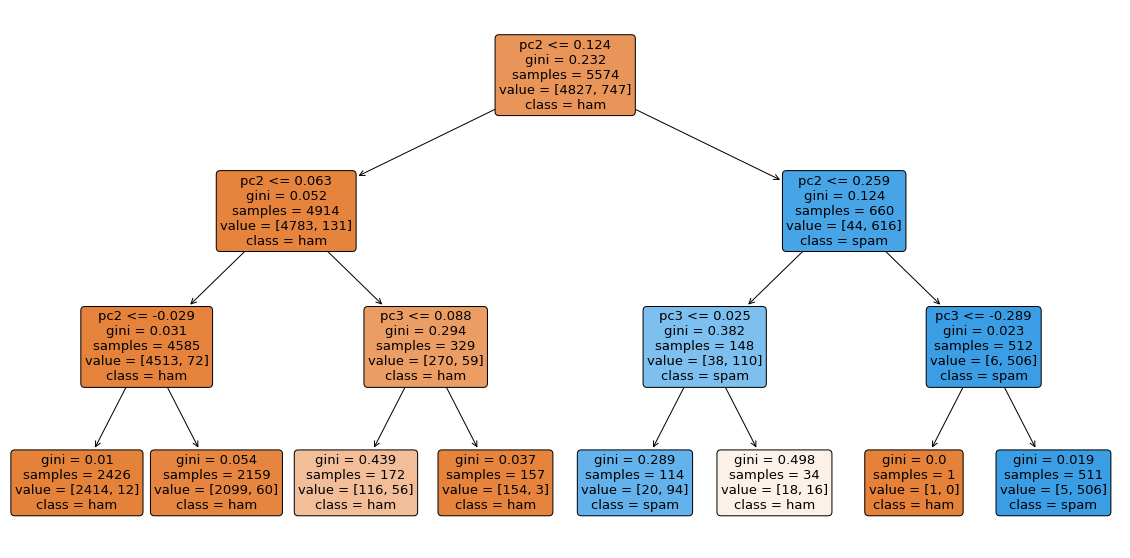

In [ ]:
# show the tree in graphics with plot_tree
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(DecisionTreeClassifier(random_state=1, max_depth=3).fit(X_1_char_3_pca, t),
               feature_names=X_1_char_3_pca.columns,
               class_names=t.unique(), 
               filled=True, 
               rounded=True)

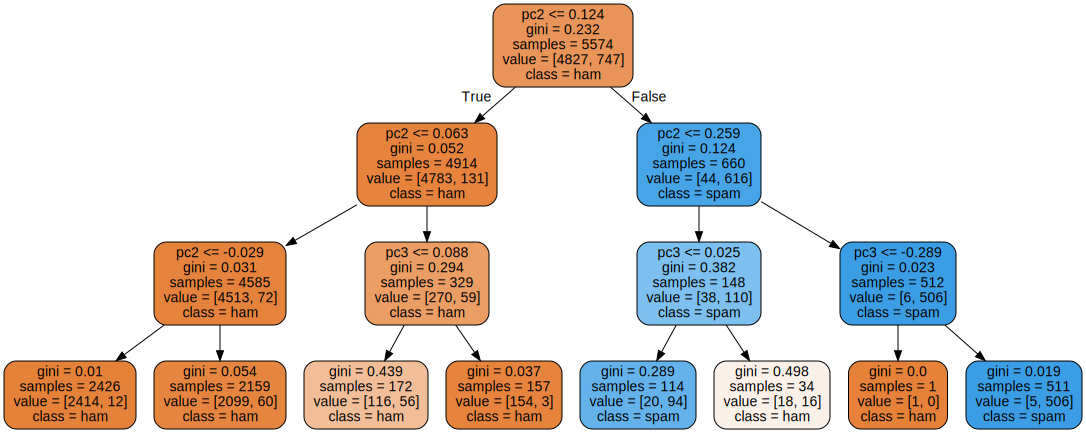

In [ ]:
# show the tree in graphics with graphviz
import graphviz 
dot_data = tree.export_graphviz(DecisionTreeClassifier(random_state=1, max_depth=3).fit(X_1_char_3_pca, t),
               feature_names=X_1_char_3_pca.columns,
               class_names=t.unique(), 
               filled=True, 
               rounded=True)
graph = graphviz.Source(dot_data) 
graph

## Random Forest

The fundamental idea behind a random forest is to combine many decision trees into a single model.  
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  
Individually, predictions made by decision trees may not be accurate but combined together, the predictions will be closer to the mark on average.  

Each decision tree in the forest considers a random subset of features and only has access to a random set of the training data points (Bootstrap).  
Each decision tree in the forest may have a maximum depth.  

![image](https://user-images.githubusercontent.com/41818563/103594406-4cfad280-4f01-11eb-9d99-26cfcb4aa0ac.png)


Let's use Scikit-learn [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [ ]:
# show accuracy of random forest classifier on data
from sklearn.ensemble import RandomForestClassifier

print('RandomForestClassifier score:', cross_val_score(RandomForestClassifier(random_state=1, max_depth=3), X_1_char_3_pca, t, cv=15).mean())

RandomForestClassifier score: 0.9673429363630217


## SVM 

Classifying data is a common task in machine learning.  
Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in.  
In the case of support vector machines, a data point is viewed as a p-dimensional vector (a list of p numbers), and we want to know whether we can separate such points with a (p-1)-dimensional hyperplane.  
This is called a linear classifier.  
There are many hyperplanes that might classify the data.  
One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes.  
Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.  
So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized.  
If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.  

#### Example:  
![image](https://user-images.githubusercontent.com/41818563/103595833-250d6e00-4f05-11eb-82ce-20db608575e7.png)  
H1 does not separate the classes.  
H2 does, but only with a small margin.  
H3 separates them with the maximal margin. 

### Kernels
It often happens that the sets to discriminate are not linearly separable in that space.  
For this reason, it was proposed that the original finite-dimensional space be mapped into a much higher-dimensional space, presumably making the separation easier in that space.  
To keep the computational load reasonable, the mappings used by SVM schemes are designed to ensure that dot products of pairs of input data vectors may be computed easily in terms of the variables in the original space, by defining them in terms of a kernel function k(x,y) selected to suit the problem.   

#### Example:  
![image](https://user-images.githubusercontent.com/41818563/103597588-4c663a00-4f09-11eb-8fe9-724cc7d4389d.png)  
In this example, we can transform the problem to a new feature space.  
With this, we can separate the data linearly and return to our original feature space.  

### The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where the number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

### The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates.  

Let's use Scikit-learn [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).  


In [ ]:
# show accuracy of svc on data
from sklearn.svm import SVC

print('SVC score:', cross_val_score(SVC(random_state=1), X_1_char_3_pca, t, cv=15).mean())

SVC score: 0.968239476760475


We can try and improve these results with the use of an ensemble of ensembles.  
We can create a Voting Ensemble that will get results from other ensembles and models (called estimators) and classify the data by voting between all the estimators.  
Let's use Scikit-learn [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html).  
Let's give the SVC more weight in the voting (it has the best score so far).  

In [ ]:
# show accuracy of voting ensemble classifier on data
from sklearn.ensemble import VotingClassifier

estimators = [('lr', LogisticRegression(multi_class='multinomial', random_state=1)), 
              ('rf', RandomForestClassifier(n_estimators=50, random_state=1)), 
              ('gnb', GaussianNB()), 
              ('svc', SVC(random_state=1))]

vclf1112 = VotingClassifier(estimators=estimators, voting='hard', weights=[1, 1, 1, 2])

print('Voting Classifier score:', cross_val_score(vclf1112, X_1_char_3_pca, t, cv=15).mean())

Voting Classifier score: 0.9687780772686434


Let's try to improve it by finding the best parameters with Grid Search.  

In [ ]:
# show accuracy and best parameters of voting ensemble classifier on data
%%time

vclf_hp = VotingClassifier(estimators=estimators, voting='hard', weights=[1, 1, 1, 2])
hyper_parameters = {'svc__kernel':('linear', 'rbf'), 'svc__C':[1, 22, 43], 'rf__n_estimators': [50, 100, 150], 'weights': [[1, 1, 1, 2], [1, 4, 1, 1], [1, 1, 4, 1], [1, 2, 1, 3]]}
gs_model = GridSearchCV(vclf_hp, hyper_parameters, cv=15).fit(X_1_char_3_pca, t)

print('gs_model score', gs_model.best_score_)
print('best params', gs_model.best_params_)

gs_model score 0.9698567274343294
best params {'rf__n_estimators': 50, 'svc__C': 1, 'svc__kernel': 'linear', 'weights': [1, 4, 1, 1]}
CPU times: user 14min 14s, sys: 1.62 s, total: 14min 15s
Wall time: 14min 18s


## More Information  

More ways to encode categorical data:  
[Smarter Ways to Encode Categorical Data for Machine Learning
](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)  

Theory explanation of Hashing Encoder:  
[Don’t be tricked by the Hashing Trick
](https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087)  

A practical explanation of Hashing Encoder:  
[Introducing One of the Best Hacks in Machine Learning: the Hashing Trick
](https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f)  

Explanation of the differences between TF-IDF and N-gram:  
[What is the difference between TF-IDF and n-gram?
](https://www.quora.com/What-is-the-difference-between-TF-IDF-and-n-gram)  

Example of Text Feature Extraction methods in Scikit-learn:  
[Text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)  

Guide for Decision Trees in Scikit-learn:  
[Decision Trees](https://scikit-learn.org/stable/modules/tree.html)  

Explanation of the differences between Gini and Entropy:  
[Why are implementations of decision tree algorithms usually binary and what are the advantages of the different impurity metrics?
](https://github.com/rasbt/python-machine-learning-book/blob/master/faq/decision-tree-binary.md)  

Answer on what is better Gini vs. Entropy:  
[When should I use Gini Impurity as opposed to Information Gain (Entropy)?](https://datascience.stackexchange.com/a/10273)

Explanation on Random Forest:  
[Random Forest Simple Explanation
](https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d)

Example of Random Forest in Python:  
[Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)  

Explanation on SVM:  
[Decoding Support Vector Machines
](https://towardsdatascience.com/decoding-support-vector-machines-5b81d2f7b76f)